# 탑승자 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [22]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


- 나이를 비롯한 몇 가지 데이터의 결측치가 존재

# 데이터 전처리

- 나이 데이터 결측치를 평균값으로 전처리

In [33]:
df['age'] = df['age'].fillna(29.881138)

# 데이터 분석

## 성별, 나이, 객실 등급으로 분류

In [76]:
df.pivot_table(
    values=['survived','age'],
    index=['sex'],
    aggfunc = ('count','sum','mean')
)

age                          survived               
       count       mean           sum    count      mean  sum
sex                                                          
female   466  28.886950  13461.318764      466  0.727468  339
male     843  30.430712  25653.090530      843  0.190985  161

In [73]:
df.pivot_table(
    values=['survived','age'],
    index=('sex','pclass'),
    aggfunc = ('count','sum','mean')
)

age                          survived               
              count       mean           sum    count      mean  sum
sex    pclass                                                       
female 1        144  36.490920   5254.692518      144  0.965278  139
       2        106  27.566636   2922.063414      106  0.886792   94
       3        216  24.465569   5284.562832      216  0.490741  106
male   1        179  39.285429   7032.091864      179  0.340782   61
       2        171  30.744356   5257.284794      171  0.146199   25
       3        493  27.106925  13363.713872      493  0.152130   75

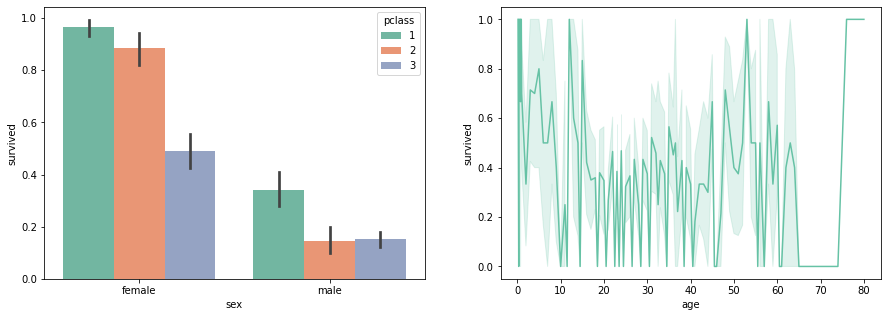

In [99]:
sns.set_palette('Set2')
plt.figure(figsize = (15,5))

# 성별과 등급별 생존률
plt.subplot(1,2,1)
sns.barplot(data=df, x='sex', y='survived', hue='pclass')

# 연령대별 생존률
plt.subplot(1,2,2)
sns.lineplot(data=df, x='age', y='survived')
plt.show()

- 남성 생존률 = 19%, 여성 생존률 = 72.7%로 여성 생존률이 높으며, 남녀 각각 모두 높은 등급의 객실 생존률이 높았다.
- 나이가 어리거나 많을수록 생존률이 높았다.

## 여성의 결혼 여부에 따른 생존률 분석

- 여성의 생존률이 월등히 높으므로 , 여성의 결혼 여부에 따른 생존률 분석

In [100]:
df_miss = df[df['name'].str.contains('Miss')]
df_mrs = df[df['name'].str.contains('Mrs')]

In [101]:
df_miss['survived'].mean()

0.676923076923077

In [102]:
df_mrs['survived'].mean()

0.7860696517412935

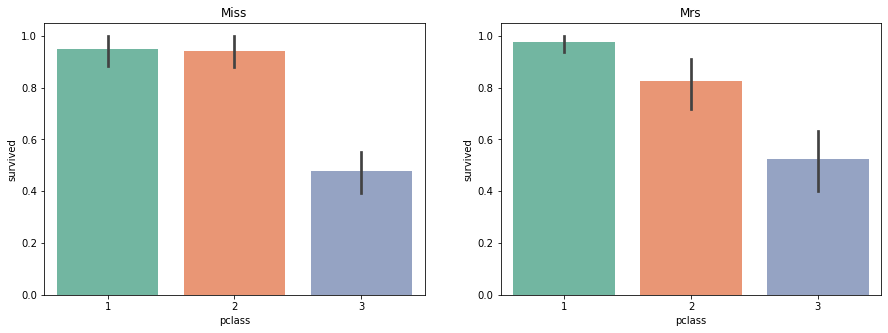

In [103]:
# 여성 기혼 여부에 따른 등급별 생존률

# 미혼여성
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Miss')
sns.barplot(data=df_miss, x='pclass', y='survived')

# 기혼여성
plt.subplot(1,2,2)
plt.title('Mrs')
sns.barplot(data=df_mrs, x='pclass', y='survived')
plt.show()

- 미혼 여성 생존률 67.6%, 기혼 여성 생존률 78.6% 으로 기혼 여성 생존률이 더 높았다
- 기혼, 미혼 여성 모두 1,2등급 객실 생존률이 높았고, 3등급은 낮았다

## 선착장에 따른 생존률 분석

In [121]:
df.pivot_table(
    values=['survived'],
    index='sex',
    columns=['embarked','pclass'],
    aggfunc=['count','mean'])

count                                       mean            \
         survived                                   survived             
embarked        C          Q           S                   C             
pclass          1   2   3  1  2   3    1    2    3         1         2   
sex                                                                      
female         71  11  31  2  2  56   69   93  129  0.971831  1.000000   
male           70  17  70  1  5  57  108  149  366  0.400000  0.294118   

                                                                      
                                                                      
embarked              Q                        S                      
pclass           3    1    2         3         1         2         3  
sex                                                                   
female    0.709677  1.0  1.0  0.589286  0.956522  0.870968  0.395349  
male      0.214286  0.0  0.0  0.122807  0.305556  0.134228  0.144809

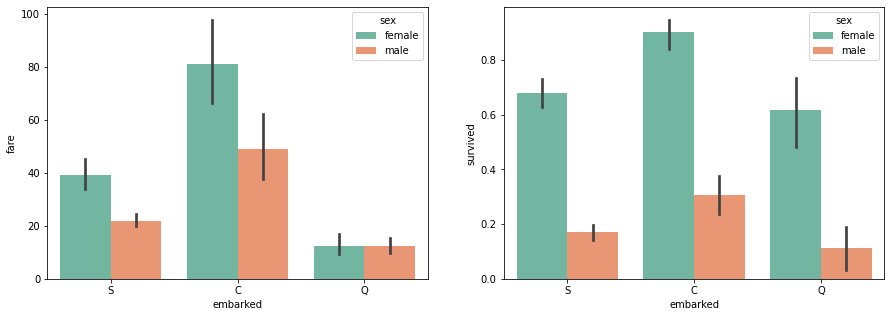

In [151]:
# 요금 결측치 1건 평균값으로 저장
df['fare'].fillna(33.295479)

plt.figure(figsize=(15,5))

# 선착장과 요금의 관계
plt.subplot(1,2,1)
sns.barplot(data=df , y='fare', x='embarked', hue='sex')

# 선착장과 생존률
plt.subplot(1,2,2)
sns.barplot(data=df ,  y='survived', x='embarked', hue='sex')
plt.show()

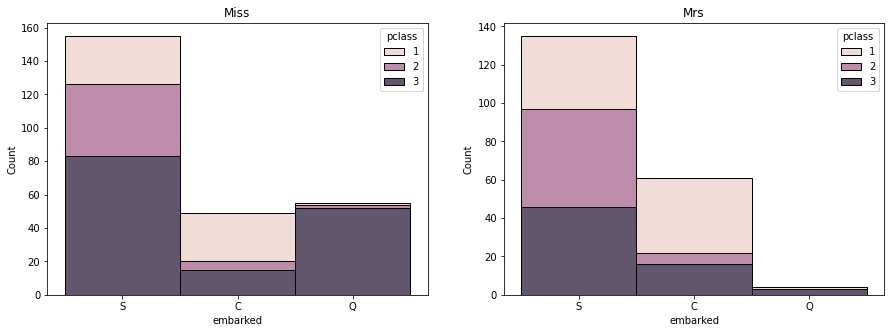

In [148]:
# 여성의 선착장 별 인원

# 미혼여성
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Miss')
sns.histplot(data=df_miss, x='embarked', hue='pclass', multiple='stack')

# 기혼여성
plt.subplot(1,2,2)
plt.title('Mrs')
sns.histplot(data=df_mrs, x='embarked', hue='pclass', multiple='stack')
plt.show()

- C 선착장이 대부분 표값이 비싸며 1등석 비율이 높았다
- 기혼 여성이 대부분 미혼 여성보다 부유하며 1,2등석 비율이 더 높았고, 미혼 여성은 3등석 비율이 높았다
- 표 값과 객실등급 비율로 볼때 C -> S -> Q 순으로 부유층이 많은 도시로 볼수 있다

# 종합 결론 

> 전체적으로 여성이 남성에 비해 월등히 생존률이 높았다 (남성 생존률 = 19%, 여성 생존률 = 72.7%)

> 미혼 여성에 비해 기혼 여성의 생존률이 높았으며 (미혼 여성 생존률 = 67.6%, 기혼 여성 생존률 = 78.6%)  
> 상위 등급 객실의 인원의 생존률의 높았다

> C -> S -> Q 선착장 순으로 생존률이 높았다

> 생존률엔 성별의 요소가 가장 크게 작용하고, 두번째 요소는 객실 등급이다.  
> 1등석이 가장 많은 C 도시의 인원이 가장 많은 비율로 생존했으며, 3등석이 많은 Q 도시의 인원이 가장 많은 비율로 사망했다.